In [45]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods_epsilon.csv'), header = F, sep = ";")

In [46]:
head(data)
nrow(data)

V1,V2,V3,V4,V5,V6
0,SpatialJoin,10,4,5,462.226
1,SpatialJoin,10,4,5,444.708
2,SpatialJoin,10,4,5,446.822
3,SpatialJoin,10,4,5,455.671
4,SpatialJoin,10,4,5,453.472
5,MergeLast,10,4,5,484.132


[1] 66

In [47]:
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
10,4,5,MergeLast,483.4434,4.166888
10,4,5,SpatialJoin,452.5798,7.044824
15,4,5,MergeLast,496.5968,5.760131
15,4,5,SpatialJoin,505.2922,10.092524
20,4,5,MergeLast,505.2672,11.067578
20,4,5,SpatialJoin,585.2887,15.958481
25,4,5,MergeLast,519.9606,5.149485
25,4,5,SpatialJoin,722.0828,27.904416
30,4,5,MergeLast,531.4094,6.904833
30,4,5,SpatialJoin,722.1781,49.764907


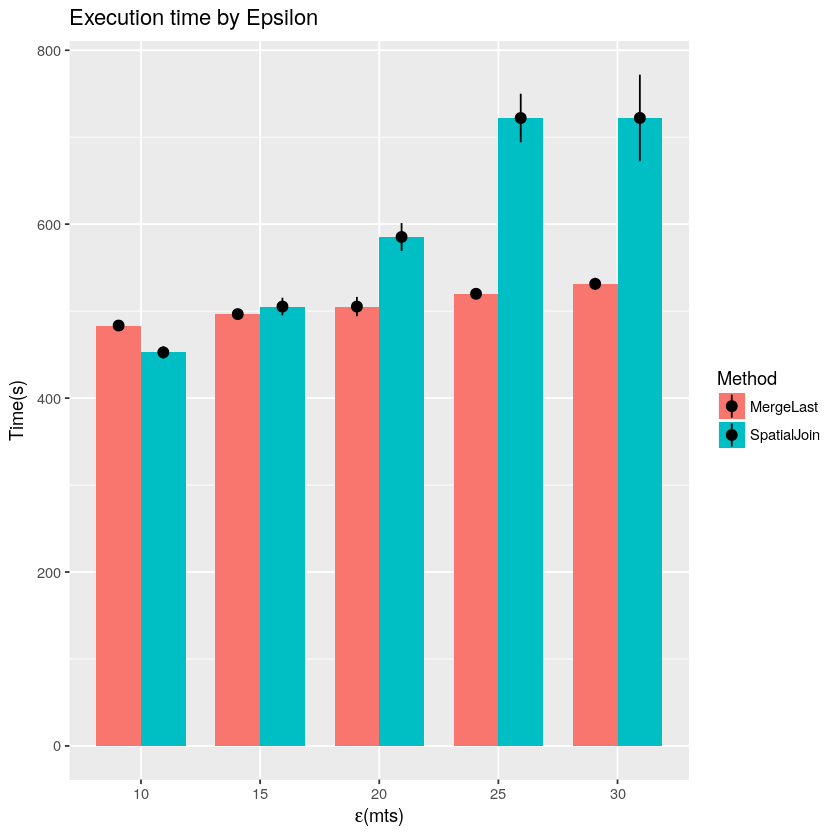

In [48]:
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [ ]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running MergeLast", ]

stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages)


In [ ]:
title = "Execution time MergeLast by Epsilon and Stage"
g = ggplot(data=stages[stages$Method == "MergeLast",], aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [ ]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running SpatialJoin", ]

stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages)


In [ ]:
title = "Execution time SpatialJoin by Epsilon and Stage"
g = ggplot(data=stages[stages$Method == "SpatialJoin",], aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [ ]:
mdfInternals = read.csv(paste0(RESEARCH_HOME, PATH, 'mdfInternals.csv'), header = F, sep = ";")
names(mdfInternals) = c("runID", "mdfID", "stageID", "Epsilon", "Mu", "Delta", "Method", "Stage", "Load", "Time")
mdfInternals$Epsilon = as.numeric(as.character(mdfInternals$Epsilon))
mdfInternals$Mu      = as.numeric(as.character(mdfInternals$Mu))
mdfInternals$Delta   = as.numeric(as.character(mdfInternals$Delta))
mdfInternals$Load    = as.numeric(as.character(mdfInternals$Load))
mdfInternals$Time    = as.numeric(as.character(mdfInternals$Time))

mdfInternals = summaryBy(data=mdfInternals, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(mdfInternals)


In [ ]:
title = "Execution time MergeLast - Internal Maximal Disk Finding (by Epsilon and Stage)"
g = ggplot(data=mdfInternals, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75), size = 0.3, fatten = 1) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [ ]:
mdfInfo = read.csv(paste0(RESEARCH_HOME, PATH, 'mdfInfo.csv'), header = F, sep = ";")
names(mdfInfo) = c("Method", "Epsilon", "Mu", "Delta", "Timestamp")
mdfInfo$Epsilon   = as.numeric(as.character(mdfInfo$Epsilon))
mdfInfo$Mu        = as.numeric(as.character(mdfInfo$Mu))
mdfInfo$Delta     = as.numeric(as.character(mdfInfo$Delta))
mdfInfo$Timestamp = as.numeric(as.character(mdfInfo$Timestamp))

mdfInfo


In [ ]:
query = "
SELECT
    Method, Epsilon, Timestamp, count(*)
FROM
    mdfInfo
GROUP BY
    Method, Epsilon, Timestamp
"
sqldf(query)